In [2]:
import sys
!{sys.executable} -m pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633983 sha256=e663c0096945c952c0bd129704f998b97f11d4cd3f7aeb7ed4e43b54d2b57187
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [7]:
import io
rating = pd.read_csv(io.BytesIO(uploaded['ratings_small.csv']))

In [8]:
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [9]:
rating.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [10]:
rating.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [11]:
rating['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [12]:
rating['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: movieId, Length: 9066, dtype: int64

In [13]:
reader = Reader()
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [14]:
probmf_svd = SVD(biased = False)
cv_probmf = cross_validate(probmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0077  1.0111  1.0099  1.0060  1.0188  1.0107  0.0044  
MAE (testset)     0.7777  0.7812  0.7819  0.7761  0.7868  0.7807  0.0037  
Fit time          6.49    5.49    5.46    5.44    6.47    5.87    0.50    
Test time         0.16    0.23    0.23    0.17    0.16    0.19    0.03    


In [15]:
cv_probmf

{'test_rmse': array([1.00773472, 1.01111367, 1.00993115, 1.00598362, 1.01878913]),
 'test_mae': array([0.77768904, 0.78117789, 0.78186222, 0.77612071, 0.78684063]),
 'fit_time': (6.492025375366211,
  5.4897496700286865,
  5.462689638137817,
  5.440065622329712,
  6.470390796661377),
 'test_time': (0.15810489654541016,
  0.22973132133483887,
  0.22988080978393555,
  0.17410564422607422,
  0.15767717361450195)}

In [17]:
print('MAE and PMF average for Collaborative Filtering is  ', cv_probmf['test_mae'].mean())
print('RMSE and PMF average for Collaborative Filtering is ', cv_probmf['test_rmse'].mean())

MAE and PMF average for Collaborative Filtering is   0.7807380978818721
RMSE and PMF average for Collaborative Filtering is  1.0107104563690492


In [18]:
sim_options = {'user_based': True}
user_colf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_colf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9708  0.9671  0.9639  0.9667  0.9674  0.0023  
MAE (testset)     0.7444  0.7465  0.7433  0.7436  0.7401  0.7436  0.0021  
Fit time          0.14    0.19    0.18    0.24    0.17    0.18    0.03    
Test time         1.76    1.65    1.67    3.28    1.75    2.02    0.63    


In [19]:
print('MAE Average for Userbased collaborative filtering is  ', cv_ub['test_mae'].mean())
print('RMSE Average for Userbased collaborative filtering is  ', cv_ub['test_rmse'].mean())

MAE Average for Userbased collaborative filtering is   0.7435802928596733
RMSE Average for Userbased collaborative filtering is   0.9674354056199009


In [20]:
sim_options = {'user_based': False}
item_based_colf = KNNBasic(sim_options=sim_options)
cv_itb = cross_validate(item_based_colf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9369  0.9348  0.9276  0.9365  0.9371  0.9346  0.0036  
MAE (testset)     0.7233  0.7218  0.7176  0.7187  0.7245  0.7212  0.0026  
Fit time          8.41    12.58   6.40    4.83    5.58    7.56    2.78    
Test time         12.73   11.76   8.20    9.29    7.81    9.96    1.95    


In [21]:
print('MAE Average for Itembased collaborative filtering is ', cv_itb['test_mae'].mean())
print('RMSE Average for Itembased collaborative filtering is ', cv_itb['test_rmse'].mean())

MAE Average for Itembased collaborative filtering is  0.7211660972914535
RMSE Average for Itembased collaborative filtering is  0.9345769518170755


In [22]:
#Cosine
sim_options = {'name':'cosine', 'user_based': True}
usb_cosine = KNNBasic(sim_options=sim_options);
cv_usb_cos = cross_validate(usb_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9971  0.9900  0.9947  0.9881  0.9911  0.9922  0.0033  
MAE (testset)     0.7741  0.7657  0.7676  0.7611  0.7652  0.7667  0.0042  
Fit time          0.40    0.40    0.42    0.44    0.51    0.43    0.04    
Test time         1.75    1.75    1.87    1.70    2.50    1.91    0.30    


In [23]:
#MSD
sim_options = {'name':'msd', 'user_based': True}
usb_msd = KNNBasic(sim_options=sim_options);
cv_usb_msd = cross_validate(usb_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9698  0.9642  0.9652  0.9674  0.9754  0.9684  0.0040  
MAE (testset)     0.7482  0.7382  0.7444  0.7395  0.7506  0.7442  0.0048  
Fit time          0.15    0.20    0.40    0.23    0.18    0.23    0.09    
Test time         1.73    1.70    4.09    2.50    1.86    2.38    0.90    


In [24]:
#Pearson
sim_options = {'name':'pearson', 'user_based': True}
usb_pearson = KNNBasic(sim_options=sim_options);
cv_usb_pearson = cross_validate(usb_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9924  0.9986  1.0020  0.9999  0.9979  0.9982  0.0032  
MAE (testset)     0.7682  0.7734  0.7771  0.7749  0.7719  0.7731  0.0030  
Fit time          0.58    0.59    0.64    0.61    0.63    0.61    0.02    
Test time         1.69    1.72    1.70    1.68    1.88    1.74    0.07    


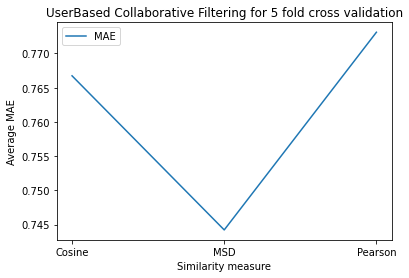

In [25]:
#Observation
x = [0,1,2]
y_mae = [cv_usb_cos['test_mae'].mean(),cv_usb_msd['test_mae'].mean(),cv_usb_pearson['test_mae'].mean()]
#y_rmse = [cv_usb_cos['test_rmse'].mean(),cv_usb_msd['test_rmse'].mean(),cv_usb_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
#plt.plot(x, y_rmse)
plt.title('UserBased Collaborative Filtering for 5 fold cross validation')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average MAE')
plt.show()

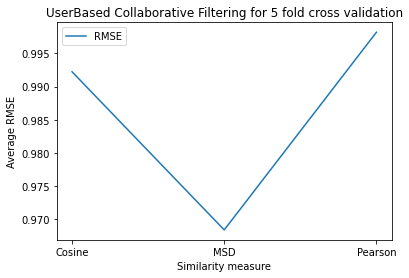

In [26]:
#Observation
x = [0,1,2]
y_rmse = [cv_usb_cos['test_rmse'].mean(),cv_usb_msd['test_rmse'].mean(),cv_usb_pearson['test_rmse'].mean()]
plt.plot(x, y_rmse)
plt.title('UserBased Collaborative Filtering for 5 fold cross validation')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average RMSE')
plt.show()

In [27]:
#Item-based CF
#Cosine
sim_options = {'name':'cosine', 'user_based': False}
itb_cos = KNNBasic(sim_options=sim_options);
cv_itb_cos = cross_validate(itb_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9965  0.9965  0.9938  0.9926  0.9945  0.9948  0.0015  
MAE (testset)     0.7748  0.7746  0.7753  0.7740  0.7740  0.7745  0.0005  
Fit time          18.30   15.29   18.67   15.88   14.68   16.56   1.62    
Test time         7.22    7.54    7.35    9.84    7.17    7.82    1.01    


In [28]:
#MSD
sim_options = {'name':'msd', 'user_based': False}
itb_msd = KNNBasic(sim_options=sim_options);
cv_itb_msd = cross_validate(itb_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9397  0.9330  0.9392  0.9285  0.9322  0.9345  0.0043  
MAE (testset)     0.7226  0.7192  0.7246  0.7179  0.7186  0.7206  0.0026  
Fit time          5.21    4.93    5.17    4.82    7.51    5.53    1.00    
Test time         8.12    8.52    7.70    11.80   9.03    9.03    1.45    


In [29]:
#Pearson
sim_options = {'name':'pearson', 'user_based': False}
itb_pearson = KNNBasic(sim_options=sim_options);
cv_itb_pearson = cross_validate(itb_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9857  0.9938  0.9919  0.9879  0.9890  0.9897  0.0029  
MAE (testset)     0.7633  0.7668  0.7703  0.7700  0.7686  0.7678  0.0026  
Fit time          26.68   26.01   27.92   24.06   20.23   24.98   2.68    
Test time         11.42   11.88   9.12    7.58    8.44    9.69    1.68    


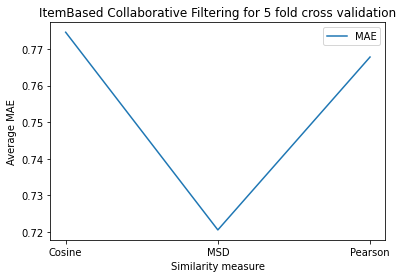

In [30]:
#Observation1 for MAE
x = [0,1,2]
y_mae = [cv_itb_cos['test_mae'].mean(),cv_itb_msd['test_mae'].mean(),cv_itb_pearson['test_mae'].mean()]
plt.plot(x, y_mae)
plt.title('ItemBased Collaborative Filtering for 5 fold cross validation')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average MAE')
plt.show()

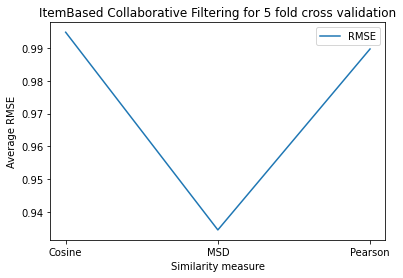

In [31]:
#Observation2 for RMSE
x = [0,1,2]
y_rmse = [cv_itb_cos['test_rmse'].mean(),cv_itb_msd['test_rmse'].mean(),cv_itb_pearson['test_rmse'].mean()]
plt.plot(x, y_rmse)
plt.title('ItemBased Collaborative Filtering for 5 fold cross validation')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average RMSE')
plt.show()

In [33]:
#Number of neighbours
trainDaset, testDaset = train_test_split(data, test_size = 0.25, random_state = 42)

In [34]:
#User Based CF
usbc_nn_mae = []
usbc_nn_rmse = []
k1 = list(np.arange(1,20,1))
for i in k1:
  usbc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  usbc_nn.fit(trainDaset)
  predictions = usbc_nn.test(testDaset)
  usbc_nn_mae.append(accuracy.mae(predictions))
  usbc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

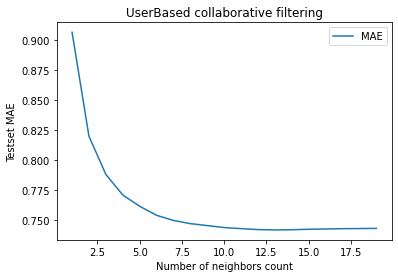

In [36]:
plt.plot(k1,usbc_nn_mae)
#plt.plot(k1,usbc_nn_rmse)
plt.xlabel('Number of neighbors count')
plt.ylabel('Testset MAE')
plt.legend(['MAE'])
plt.title('UserBased collaborative filtering')
plt.show()

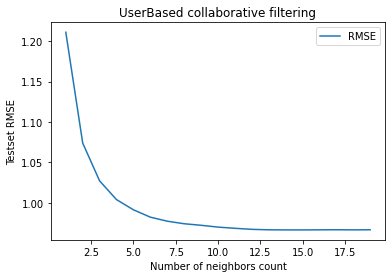

In [37]:
plt.plot(k1,usbc_nn_rmse)
plt.xlabel('Number of neighbors count')
plt.ylabel('Testset RMSE')
plt.legend(['RMSE'])
plt.title('UserBased collaborative filtering')
plt.show()

In [39]:
#finding best K value
k_usbc = usbc_nn_rmse.index(min(usbc_nn_rmse))+1
print('optimum best Value of K : ', k_usbc)
print('RMSE minimum value: ', min(usbc_nn_rmse))

optimum best Value of K :  15
RMSE minimum value:  0.9663589276453397


In [41]:
#Item-based CF
itbc_nn_mae = []
itbc_nn_rmse = []
for i in k1:
  itbc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  itbc_nn.fit(trainDaset)
  predictions = itbc_nn.test(testDaset)
  itbc_nn_mae.append(accuracy.mae(predictions))
  itbc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8749
RMSE: 1.1479
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8142
RMSE: 1.0514
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7855
RMSE: 1.0127
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 0.9935
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7614
RMSE: 0.9816
Computing 

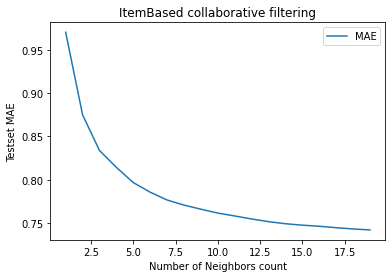

In [42]:
plt.plot(k1,itbc_nn_mae)
plt.xlabel('Number of Neighbors count')
plt.ylabel('Testset MAE')
plt.legend(['MAE'])
plt.title('ItemBased collaborative filtering')
plt.show()

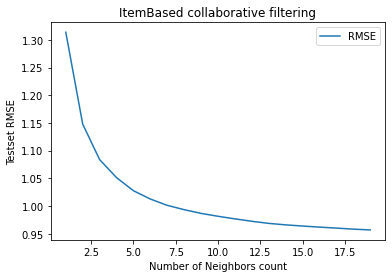

In [43]:
plt.plot(k1,itbc_nn_rmse)
plt.xlabel('Number of Neighbors count')
plt.ylabel('Testset RMSE')
plt.legend(['RMSE'])
plt.title('ItemBased collaborative filtering')
plt.show()

In [44]:
#finding best k
k_itbc = itbc_nn_rmse.index(min(itbc_nn_rmse))+1
print('Best Value of K : ', k_itbc)
print('Minimum RMSE : ', min(itbc_nn_rmse))

Best Value of K :  19
Minimum RMSE :  0.9569102441293966
